In [167]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import time
import csv

In [198]:
URL_list = 'https://m.imdb.com/chart/moviemeter/'

In [199]:
headers={'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36'}
r = requests.get(URL_list, headers=headers)
r

<Response [200]>

In [200]:
soup = BeautifulSoup(r.text , 'html.parser')

In [201]:
ul = soup.findAll('li',{'class':'ipc-metadata-list-summary-item sc-10233bc-0 iherUv cli-parent'})
a_hrefs_list = []
for link in ul:
  links = link.find('a',{'class':'ipc-lockup-overlay ipc-focusable'})
  a_hrefs_list.append("https://m.imdb.com" + links['href'])

In [202]:
titles = []
years = []
durations = []
images = []
genres_list = []
stars_list = []
directorNames = []
ratings = []

for link in a_hrefs_list:
    r2 = requests.get(link, headers=headers)
    soup = BeautifulSoup(r2.content, 'html.parser')

    title = soup.find('span', {'class': 'hero__primary-text'}).text.strip()
    titles.append(title)

    ul = soup.find('ul', {'class': 'ipc-inline-list ipc-inline-list--show-dividers sc-d8941411-2 cdJsTz baseAlt'})
    li = ul.findAll('li', {'class': 'ipc-inline-list__item'})
    if len(li) > 2:
        durations.append(li[2].text.strip())
    else:
        durations.append("Not Found")

    year = ul.find('a', {'class': 'ipc-link ipc-link--baseAlt ipc-link--inherit-color'}).text.strip()
    if len(year) > 1:
        years.append(year)
    else:
        years.append("Not Found")

    img = soup.find('img', {'class': 'ipc-image'})
    images.append(img['src'])

    genreDiv = soup.find('div', {'class': 'ipc-chip-list__scroller'})
    Allgenres = genreDiv.findAll('span', {'class': 'ipc-chip__text'})

    starsUl = soup.find('ul',{'class':'ipc-metadata-list ipc-metadata-list--dividers-all title-pc-list ipc-metadata-list--baseAlt'})
    starsLi = starsUl.find('li',{'class':'ipc-metadata-list__item ipc-metadata-list-item--link'})
    starsDiv = starsLi.find('div',{'class':'ipc-metadata-list-item__content-container'})
    AllStars = starsDiv.findAll('a',{'class':'ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link'})

    directorDiv = soup.find('li',{'class':'ipc-metadata-list__item'})
    dirname = directorDiv.find('a',{'class':'ipc-metadata-list-item__list-content-item ipc-metadata-list-item__list-content-item--link'}).text.strip()
    directorNames.append(dirname)

    ratingDiv = soup.find('div',{'class':'sc-bde20123-2 cdQqzc'})
    if(ratingDiv):
      ratings.append(ratingDiv.find('span',{'class':'sc-bde20123-1 cMEQkK'}).text.strip())
    else:
      ratings.append("No Rating")

    genres_for_link = []
    stars_for_link = []

    for genre in Allgenres:
        genres = genre.text.strip().split(', ')
        genres_for_link.extend(genres)

    for star in AllStars:
      stars = star.text.strip().split(', ')
      stars_for_link.extend(stars)


    genres_list.append(genres_for_link)
    stars_list.append(stars_for_link)

In [203]:
movies_data = []
for i in range(len(titles)):
    movie = {
        'Title': titles[i],
        'Year': years[i],
        'Duration': durations[i],
        'Image': images[i],
        'Genres': ', '.join(genres_list[i]),
        'Stars': ', '.join(stars_list[i]),
        'Director': directorNames[i],
        'Rating': ratings[i]
    }
    movies_data.append(movie)

with open('movies_data.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Title', 'Year', 'Duration', 'Image', 'Genres', 'Stars', 'Director', 'Rating']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for movie in movies_data:
        writer.writerow(movie)

In [208]:
df = pd.read_csv('movies_data.csv')
df

,Title,Year,Duration,Image,Genres,Stars,Director,Rating
0,Civil War,2024,1h 49m,https://m.media-amazon.com/images/M/MV5BYTYyOD...,"Action, Adventure, Thriller","Kirsten Dunst, Wagner Moura, Cailee Spaeny",Alex Garland,7.6
1,Challengers,2024,2h 11m,https://m.media-amazon.com/images/M/MV5BNTk1MT...,"Drama, Romance, Sport","Zendaya, Mike Faist, Josh O'Connor",Luca Guadagnino,7.8
2,Rebel Moon - Part Two: The Scargiver,2024,2h 2m,https://m.media-amazon.com/images/M/MV5BYmQ2OD...,"Action, Adventure, Drama","Zack Snyder, Kurt Johnstad, Shay Hatten",Zack Snyder,5.2
3,Abigail,2024,1h 49m,https://m.media-amazon.com/images/M/MV5BY2JlYj...,"Horror, Thriller","Stephen Shields, Guy Busick, Stephen Shields",Matt Bettinelli-Olpin,7.1
4,The Ministry of Ungentlemanly Warfare,2024,2h,https://m.media-amazon.com/images/M/MV5BOWI5YT...,"Action, Drama, War","Paul Tamasy, Eric Johnson, Arash Amel",Guy Ritchie,7.3
...,...,...,...,...,...,...,...,...
95,War for the Planet of the Apes,2017,2h 20m,https://m.media-amazon.com/images/M/MV5BZjQwMT...,"Action, Adventure, Drama","Mark Bomback, Matt Reeves, Rick Jaffa",Matt Reeves,7.4
96,Miller's Girl,2024,1h 33m,https://m.media-amazon.com/images/M/MV5BM2JiYT...,"Comedy, Drama","Martin Freeman, Jenna Ortega, Bashir Salahuddin",Jade Halley Bartlett,5.2
97,Kingdom of Heaven,2005,2h 24m,https://m.media-amazon.com/images/M/MV5BMzliMG...,"Action, Adventure, Drama","Orlando Bloom, Eva Green, Liam Neeson",Ridley Scott,7.3
98,Bullet Train,2022,2h 7m,https://m.media-amazon.com/images/M/MV5BMDU2Zm...,"Action, Comedy, Thriller","Brad Pitt, Joey King, Aaron Taylor-Johnson",David Leitch,7.3


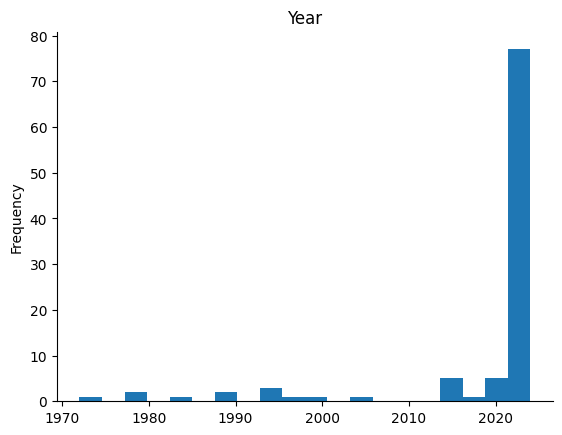

In [205]:
from matplotlib import pyplot as plt
df['Year'].plot(kind='hist', bins=20, title='Year')
plt.gca().spines[['top', 'right',]].set_visible(False)